In [0]:
device = 'cuda'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

In [0]:
tfms = get_transforms(do_flip=False)

**READING LABELS FROM FOLDER WHICH ARE ALREADY NAMED WITH DIFFERENT LABELS**

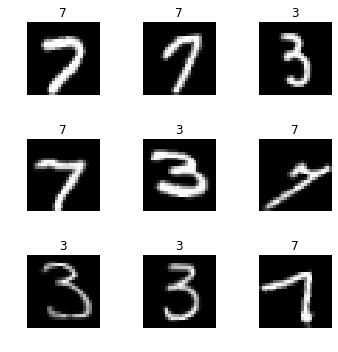

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)
data.show_batch(rows=3, figsize=(5,5))

**READING LABEL FROM CSV**

[0, 1]

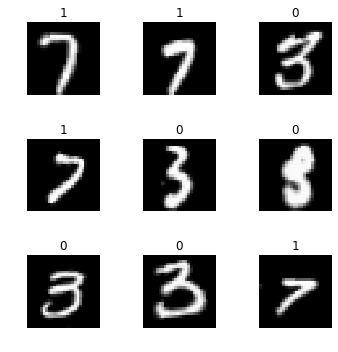

In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)
data.show_batch(rows=3, figsize=(5,5))
data.classes

**READING LABEL FROM DATA FRAME**

In [0]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

**READING LABEL FROM FILE NAME**

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

**READING LABEL USING from_name_func**

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

**READING LABEL USING LIST**

In [0]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

**TRAINING MODEL**

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.263401,0.104945,0.958766,00:21
1,0.134504,0.074101,0.972626,00:22
